In [1]:
'''
1. Χρήση του Tweepy για την λήψη περιεχομένου από το twitter που να σχετίζεται με ένα σύνολο όρων ή hashtags
2. Επεξεργασία του περιεχομένου που λαμβάνεται ώστε να διαπιστωθεί αν έχουν θετική, αρνητική ή ουδέτερη χροιά.
   Προσεγγίσεις με την χρήση λεξικού
'''
#Εγκατάσταση Modules
#!pip install textblob
#!pip install tweepy
#!pip install pycountry
#!pip install wordcloud
#!pip install langdetect
#!pip install spacy_langdetect
#!pip uninstall googletrans
#!pip install googletrans==3.1.0a0
#!pip install pycountry
#!pip install langdetect
#!pip install emoji
#!pip install afinn
#!pip install senticnet


'\n1. Χρήση του Tweepy για την λήψη περιεχομένου από το twitter που να σχετίζεται με ένα σύνολο όρων ή hashtags\n2. Επεξεργασία του περιεχομένου που λαμβάνεται ώστε να διαπιστωθεί αν έχουν θετική, αρνητική ή ουδέτερη χροιά.\n   Προσεγγίσεις με την χρήση λεξικού\n'

In [5]:
# Ενσωμάτωση των απαραίτητων βιβλιοθηκών
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')
from nltk.corpus import webtext
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import datetime


import pandas as pd
from langdetect import detect

import calendar
import time

import emoji

from afinn import Afinn

from senticnet.senticnet import SenticNet

from senticnet.babelsenticnet import BabelSenticNet

import re

import nltk
from nltk.corpus import sentiwordnet as swn
from nltk import pos_tag
from nltk.tag import str2tuple, map_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet as wn
from nltk.stem import PorterStemmer

import nltk
nltk.download('averaged_perceptron_tagger')

import nltk
nltk.download('sentiwordnet')
nltk.download('punkt')


nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


# Ανάκτηση Δεδομένων από το twitter

In [6]:
#Κλάση αντικειμένων για την λήψη tweets
class TweepyAnalysis:

    def __init__(self):
        # Authentication
        self.consumerKey = "aHuS8BOiVv04KUfjhBnVE8Ybm"
        self.consumerSecret = "snUDYYjq2uVp0kT1zFzYac5ap7xEMdXX7MYoLdccVyUukXU2NA"
        self.accessToken = "91788750-0Iassfo13aQ01Ul9H9pJxH9mKbAujoqQXY6hh3PP3"
        self.accessTokenSecret = "qk6IEnbugrytseV8TPnMiSQ1dCbbljoZrhVHvGR8xZf1h"
        self.auth = tweepy.OAuthHandler(self.consumerKey, self.consumerSecret)
        self.auth.set_access_token(self.accessToken, self.accessTokenSecret)
        self.api = tweepy.API(self.auth)
    
    #Αρχικοποίηση παραμέτρων
    def InitiliazationParameters(self):
        #Καθορίζεται ο αριθμός των tweets που θα ληφθούν
        self.statuses = 20000
        self.pages = 200
    
    #Λαμβάνει tweets που σχετίζονται με τις λέξεις που υπάρχουν στην λίστα
    #της παραμέτρου
    def GettingTweets(self,keywords, lang):
        self.allTweets = []
        self.lang = lang
        maxtt = 0
        #Για κάθε λέξη αναζ΄ήτησης
        for w in keywords:
            #επανάληψη για κάθε page
            for rep in range(0,self.pages):
                try:
                    #αντιμετώπιση του περιορισμου του tweepy που σχετίζεται με 
                    #το πόσα tweets είναι επιτρεπτό να ανακτ΄ώνται στην μονάδα του
                    #χρόνου
                    #Λαμβάνονται tweets στα αγγλικά εξαιρουμένων των retweets
                    if maxtt==0:
                        tweets = tweepy.Cursor(self.api.search, q=w+"  -filter:retweets", wait_on_rate_limit=True, lang=self.lang).items(self.statuses)
                    else:
                        tweets = tweepy.Cursor(api.search, q=w, max_id=maxtt, wait_on_rate_limit=True, lang='en').items(self.statuses)
                    #προσθήκη των tweets στα συνολικά ληφθέντα
                    for tweet in tweets:
                        self.allTweets.append(tweet)
                    if maxtt < self.allTweets[len(self.allTweets)-1].id:
                        maxtt = self.allTweets[len(self.allTweets)-1].id
                except:
                    continue
    #μετατρέπει την λίστα των tweets σε dataframe            
    def getTweetsInDataFrame(self):
        listDict = []
        for tt in self.allTweets:
            v = dict({"id":tt.id, "created_at":tt.created_at,"text":tt.text ,"place":tt.place,"location":tt.user.location,"lang":tt.lang})
            listDict.append(v)
        #το dft περιλαμβάνει τα tweets σε dataframe μορφή
        self.dft = pd.DataFrame(listDict)
     
    #αποθήκευση του dataframe με τα tweets σε αρχείο με όνομα filename
    def exportToCsv(self,filename):
        self.dft.to_csv(filename) 
                

In [3]:
#Δημιουργία Αντικειμένου
Analysis = TweepyAnalysis()
#Αρχικοποίηση Παραμέτρων
Analysis.InitiliazationParameters()
#Καθορισμός των keywords
keyword = ["Putin","#Putin"]
#Λήψη των tweets
Analysis.GettingTweets(keyword, "en")
#Μορφοποίηση σε Dataframe
Analysis.getTweetsInDataFrame()
#Αποθήκευση σε αρχείο με ονομασία που περιλαμβάνει το τρέχον timestamp
ts = calendar.timegm(time.gmtime())
Analysis.exportToCsv("Putin_"+str(ts)+".csv")

In [4]:
#Δημιουργία Αντικειμένου
Analysis = TweepyAnalysis()
#Αρχικοποίηση Παραμέτρων
Analysis.InitiliazationParameters()
#Καθορισμός των keywords
keyword = ["Zelenskyy","#Zelenskyy"]
#Λήψη των tweets
Analysis.GettingTweets(keyword, "en")
#Μορφοποίηση σε Dataframe
Analysis.getTweetsInDataFrame()
#Αποθήκευση σε αρχείο με ονομασία που περιλαμβάνει το τρέχον timestamp
ts = calendar.timegm(time.gmtime())
Analysis.exportToCsv("Putin_"+str(ts)+".csv")

# Ανάλυση συναισθήματος σε tweets

In [6]:
def startProcess(filename, listwords):
    tweet_list_dt = pd.read_csv(filename)
    #εξαλείφοται τα διπλότυπα tweets
    tweet_list_dt.drop_duplicates(inplace = True,subset="text")
    #επαναδημιουργούνται τα Indexes του dataframe
    tweet_list_dt.reset_index(drop=True, inplace = True)
    return tweet_list_dt

def clearTweets(tweet_list_dt, listwords):
    for i in range(0,len(tweet_list_dt.text)):
        tweet = tweet_list_dt.text[i]
        #Απομάκρυνση των search terms
        tweet = " ".join(w for w in nltk.sent_tokenize(tweet, language="english") if w not in listwords)
        tweet = " ".join(w.lower() for w in nltk.sent_tokenize(tweet, language="english") if w.lower() not in listwords)
            
        #Απομάκρυση αποδεκτών (@*)
        tweet = re.sub("@[A-Za-z0-9]+","",tweet) 
        tweet = re.sub("@","",tweet) 
        
        tweet = re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet) 
        
        #Απομάκρυνση των διαδοχικ΄ών κενών χαρακτήρων
        tweet = " ".join(tweet.split())
        #Απομάκρυνση των emojis
        tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI['en']) #Remove Emojis
        #Απομάκρυνση του χαρακτήρα #
        tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
        #Απομάκρυνση λέξεων που δεν είναι της αγγλικής
        #tweet = " ".join(w.lower() for w in nltk.sent_tokenize(tweet, language="english") if w.lower() in words )
        stop_words = set(stopwords.words("english"))
        #Απομάκρυνση των stop words (Αγγλικά)
        tweet = sent_tokenize(tweet)
        tweet = " ".join(w for w in tweet if not w.lower() in stop_words)
        tweet_list_dt.text[i] = tweet 
    return tweet_list_dt

In [16]:
def performTextBlob(dt):
    #Μεταβλητές του αποτελέσματος
    positive = 0
    negative = 0
    neutral = 0 
    polarity = 0
    tweet_counter = 0
    #Για κάθε tweet
    for i in range(0, dt.shape[0]):
        tweet_text = dt.iloc[i,3]
        tweet_counter = tweet_counter + 1
        #Υπολογίζεται η τιμή του polarity
        #Αρνητικά θεωρούνται όσα έχουν polarity < -0.25
        #Θετικά θεωρούνται όσα έχουν polarity > 0.25
        #Ουδέτερα θεωρούνται τα υπόλοιπα
        analysis = TextBlob(tweet_text)
        score = SentimentIntensityAnalyzer().polarity_scores(tweet_text)
        if analysis.sentiment.polarity > 0.25:
            positive = positive + 1
        elif analysis.sentiment.polarity < -0.25:
            negative = negative + 1
        else:
            neutral = neutral + 1
        #Υπολογισμός του μέσου polarity
        polarity = polarity + score["compound"]
    positive_pc =  100.0*(float(positive) / float(tweet_counter))
    negative_pc =  100.0*(float(negative) / float(tweet_counter))
    neutral_pc =  100.0*(float(neutral) / float(tweet_counter))
    polarity = 100.0 * (float(polarity) / float(tweet_counter))
    #Εμφάνιση των στατιστικών
    print("Πλήθος Αναρτήσεων:" +str(dt.shape[0]))
    print("Θετικές Αναρτήσεις:"+str(positive)+" ["+str(positive_pc)+"]")
    print("Αρνητικές Αναρτήσεις:"+str(negative)+" ["+str(negative_pc)+"]")
    print("Ουδέτερες Αναρτήσεις:"+str(neutral)+" ["+str(neutral_pc)+"]")
    print("Μέση Πολικότητα:"+str(polarity))
    #Εμφάνιση διαγράμματος πίττας
    plt.pie([positive, neutral, negative], labels = ['Positive','Neutral','Negative'])
    plt.show() 
    return [positive_pc, negative_pc, neutral_pc, polarity]

In [23]:
def performAfinn(dt):
        #Μεταβλητές του αποτελέσματος
        positives = 0
        negatives = 0
        neutrals = 0
        polarity = 0
        #Αρχικοποίηση        
        af = Afinn()

        #Υπολογισμός των sentiment scores (polarity) και των labels
        #για κάθε ένα από τα tweets
        sentiment_scores = [af.score(article) for article in dt.text]
        sentiment_category = ['positive' if score > 0 
                                  else 'negative' if score < 0 
                                      else 'neutral' 
                                          for score in sentiment_scores]
        #Καταμέτρηση των tweets ανά κατηγορία
        for item in sentiment_category:
            if item == "positive":
                positives = positives + 1
            elif item == "negative":
                negatives = negatives + 1
            else:
                neutrals = neutrals + 1 
        #Υπολογισμός των ποσοστών σε κάθε κατηγορία
        positives_pc =  100.0*(float(positives) / float(len(dt.text)))
        negatives_pc =  100.0*(float(negatives) /float(len(dt.text)))
        neutrals_pc =  100.0*(float(neutrals) / float(len(dt.text)))
        #Υπολογισμός του μέσου polarity
        polarity = 100.0 * (float(polarity) /float(len(dt.text)))
        #Εμ΄φάνιση στατιστικών
        print("Πλήθος Αναρτήσεων:" +str(float(len(dt.text))))
        print("Θετικές Αναρτήσεις:"+str(positives)+" ["+str(positives_pc)+"]")
        print("Αρνητικές Αναρτήσεις:"+str(negatives)+" ["+str(negatives_pc)+"]")
        print("Ουδέτερες Αναρτήσεις:"+str(neutrals)+" ["+str(neutrals_pc)+"]")
        print("Μέση Πολικότητα:"+str(polarity))
        #Εμφάνιση διαγρ΄άμματος πίττας
        plt.pie([positives, neutrals, negatives], labels = ['Positive','Neutral','Negative'])
        plt.show()
        return [positives_pc, negatives_pc, neutrals_pc, polarity]

In [45]:
 def performsSentiWordNet(dt):
        #Μεταβλητές του αποτελέσματος
        positives = 0
        negatives = 0
        neutrals = 0
        #Λέξεις για τις οποίες δεν μπορεί να προσδιοριστεί το με΄ρος του λόγου τους
        missing_words=[]
        #Δημιουργία stemmer
        pstem = PorterStemmer()
        #Δημιουργία lemmatizer
        lem = WordNetLemmatizer()
        #Καθορισμός των stop words
        stop_words = stopwords.words("english")
        #Για κάθε tweet
        for i in range(0,len(dt)):
            #Λήψη του κειμένου
            text = dt.text[i]
            #tokenize
            tokens = nltk.word_tokenize(text)
            #Απόδοση tag στο κείμενο
            tagged_sent = pos_tag(tokens)
            #Διατήρηση της λέξης σε λίστα μαζί με το tag που της δόθηκε
            store_it = [(word, map_tag('en-ptb', 'universal', tag)) for word, tag in tagged_sent]
            #inialize positive and negative total score
            pos_total=0
            neg_total=0
            #Δημιουργία tag ανάλογα με το μέρος του λόγου που ανήκει η λέξη
            for word,tag in store_it:
                if(tag=='NOUN'):
                    tag='n'
                elif(tag=='VERB'):
                    tag='v'
                elif(tag=='ADJ'):
                    tag='a'
                elif(tag=='ADV'):
                    tag = 'r'
                else:
                    tag='nothing'
                this_word_pos = 0
                this_word_neg = 0
                #Αν το μέρος του λόγου εντοπίστηκε
                if(tag!='nothing'):
                    #Διαμόρφωση της λέξης για να αποτελέσει παράμετρο της
                    #συνάρτησης senti_synset
                    concat = word+'.'+tag+'.01'
                    #Υπολογισμός θετικότητας και αρνητικότητας
                    try:
                        this_word_pos=swn.senti_synset(concat).pos_score()
                        this_word_neg=swn.senti_synset(concat).neg_score()
                    except Exception as e:
                        #Αν δεν υπολογιστήκε η θετικότητα και η αρνητικότητα
                        #δοκιμάζεται να γίνει πρώτα lemmatize πριν τον 
                        #υπολογισμό
                        wor = lem.lemmatize(word)
                        concat = wor+'.'+tag+'.01'
                        try:
                            this_word_pos=swn.senti_synset(concat).pos_score()
                            this_word_neg=swn.senti_synset(concat).neg_score()
                        except Exception as e:
                            #Αν δεν υπολογιστήκε η θετικότητα και η αρνητικότητα
                            #δοκιμάζεται να γίνει πρώτα stemming πριν τον 
                            #υπολογισμό
                            wor = pstem.stem(word)
                            concat = wor+'.'+tag+'.01'
                            try:
                                this_word_pos=swn.senti_synset(concat).pos_score()
                                this_word_neg=swn.senti_synset(concat).neg_score()
                            except:
                                #Αφο΄υ δεν μπόρεσε να γίνει υπολογισμός 
                                #προχωράμε στην επόμενη
                                missing_words.append(word)
                                continue
                    #Υπολογισμός ολικής θετικότητας για το tweet
                    pos_total+=this_word_pos
                    #Υπολογισμός ολικής αρνητικότητας για το tweet
                    neg_total+=this_word_neg
            #Χαρακτηριστιρισμος του tweet ανάλογα με την θετικότητα
            #και την αρνητικότητα των λέξεων που το αποτελούν
            if(pos_total!=0 or neg_total!=0):
                if(pos_total>neg_total):
                    positives = positives + 1
                else:
                    negatives = negatives + 1
            else:
                neutrals = neutrals + 1
        #εκτύπωση στατιστικών    
        print("Θετικές Αναρτήσεις:"+str(positives)+" ("+str(100*positives/(positives+negatives+neutrals))+")")
        print("Ουδέτερες Αναρτήσεις:"+str(neutrals)+" ("+str(100*neutrals/(positives+negatives+neutrals))+")")
        print("Αρνητικές Αναρτήσεις:"+str(negatives)+" ("+str(100*negatives/(positives+negatives+neutrals))+")")
        #εμφάνιση διαγράμματος πίττας
        plt.pie([positives, negatives, neutrals], labels = ['Positive','Negative','Neutral',])
        plt.show() 
        return [100*positives/(positives+negatives+neutrals), 100*negatives/(positives+negatives+neutrals),100*neutrals/(positives+negatives+neutrals)]

In [38]:
def performSenticNet(dt):
        #Μεταβλητές του αποτελέσματος
        positives = 0
        neutrals = 0;
        negatives = 0
        #Για κάθε tweet
        for i in range(0,len(dt.text)):
            txt = dt.text[i]
            polarity = 0;
            count = 0
            #Γίνεται διαχωρισμός των λέξεων και εντάσσονται σε λίστα
            l_text = txt.split()
            #Για κάθε λέξη του tweet
            for cur in l_text:
                #Αρχικοποίηση
                sn = SenticNet()
                try:
                    #Υπολογισμός του polarity και προσθήκη στο συνολικό
                    polarity = polarity + float(sn.polarity_value(cur))
                    count = count + 1
                except:
                    polarity = polarity + 0
            #Αν δεν υπολογιστηκε polarity για καμία λέξη τότε αυτό γίνεται 0
            if count == 0:
                p = 0
            else:
                #Μέσο polarity
                p = polarity/count
            #Υπολογίζεται η τιμή του polarity
            #Αρνητικά θεωρούνται όσα έχουν polarity < -0.33
            #Θετικά θεωρούνται όσα έχουν polarity > 0.33
            #Ουδέτερα θεωρούνται τα υπόλοιπα
            if p<-0.33:
                negatives = negatives + 1
            elif p>0.33:
                positives = positives + 1
            else:
                neutrals = neutrals + 1
        #Εμφανίζονται τα στατιστικά
        print("Positives:"+str(positives)+" ("+str(positives/(positives+negatives+neutrals))+")")
        print("Neutrals:"+str(neutrals)+" ("+str(neutrals/(positives+negatives+neutrals))+")")
        print("Negatives:"+str(negatives)+" ("+str(negatives/(positives+negatives+neutrals))+")")     
        #Εμφανίζεται το διάγραμμα π΄ίττας
        plt.pie([positives, negatives, neutrals], labels = ['Positive','Negative','Neutral'])
        plt.show() 
        return [100*positives/(positives+negatives+neutrals), 100*negatives/(positives+negatives+neutrals),100*neutrals/(positives+negatives+neutrals)]

In [7]:
#"Putin.csv"
keywords = ["Putin","#Putin"]
dfPutin = startProcess("Putin.csv", keywords)
dfPutin = clearTweets(dfPutin, keywords)

Πλήθος Αναρτήσεων:19914
Θετικές Αναρτήσεις:2649 [13.302199457667975]
Αρνητικές Αναρτήσεις:1683 [8.45134076529075]
Ουδέτερες Αναρτήσεις:15582 [78.24645977704128]
Μέση Πολικότητα:-5.177151752535901


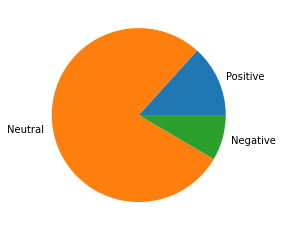

[13.302199457667975, 8.45134076529075, 78.24645977704128, -5.177151752535901]

In [17]:
performTextBlob(dfPutin)

Πλήθος Αναρτήσεων:19914.0
Θετικές Αναρτήσεις:5352 [26.87556492919554]
Αρνητικές Αναρτήσεις:7641 [38.36999096113287]
Ουδέτερες Αναρτήσεις:6921 [34.75444410967159]
Μέση Πολικότητα:0.0


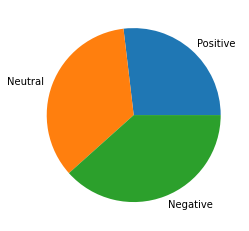

[26.87556492919554, 38.36999096113287, 34.75444410967159, 0.0]

In [24]:
performAfinn(dfPutin)

Θετικές Αναρτήσεις:7642 (38.375012553982124)
Ουδέτερες Αναρτήσεις:4164 (20.909912624284424)
Αρνητικές Αναρτήσεις:8108 (40.71507482173345)


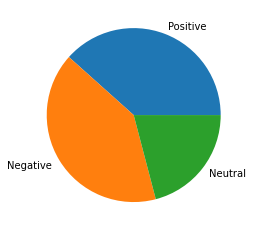

[38.375012553982124, 40.71507482173345, 20.909912624284424]

In [46]:
performsSentiWordNet(dfPutin)

Positives:2984 (0.14984433062167318)
Neutrals:11177 (0.5612634327608718)
Negatives:5753 (0.28889223661745506)


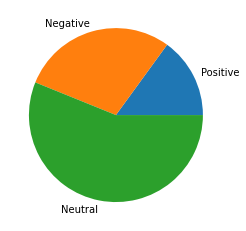

[14.98443306216732, 28.889223661745504, 56.12634327608718]

In [39]:
performSenticNet(dfPutin)

In [40]:
#"Zelenskyy.csv"
keywords = ["Zelenskyy","#Zelenskyy"]
dfZelenskyy = startProcess("Zelenskyy.csv", keywords)
dfZelenskyy = clearTweets(dfZelenskyy, keywords)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Πλήθος Αναρτήσεων:9792
Θετικές Αναρτήσεις:1257 [12.837009803921568]
Αρνητικές Αναρτήσεις:774 [7.904411764705882]
Ουδέτερες Αναρτήσεις:7761 [79.25857843137256]
Μέση Πολικότητα:-8.099753880718923


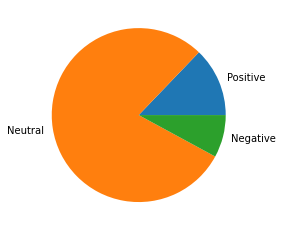

[12.837009803921568, 7.904411764705882, 79.25857843137256, -8.099753880718923]

In [41]:
performTextBlob(dfZelenskyy)

Πλήθος Αναρτήσεων:9792.0
Θετικές Αναρτήσεις:2359 [24.09109477124183]
Αρνητικές Αναρτήσεις:4027 [41.12540849673202]
Ουδέτερες Αναρτήσεις:3406 [34.783496732026144]
Μέση Πολικότητα:0.0


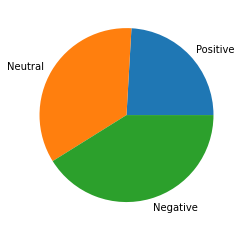

[24.09109477124183, 41.12540849673202, 34.783496732026144, 0.0]

In [42]:
performAfinn(dfZelenskyy)

Θετικές Αναρτήσεις:3838 (39.1952614379085)
Ουδέτερες Αναρτήσεις:1782 (18.198529411764707)
Αρνητικές Αναρτήσεις:4172 (42.6062091503268)


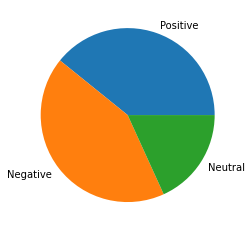

[39.1952614379085, 42.6062091503268, 18.198529411764707]

In [47]:
performsSentiWordNet(dfZelenskyy)

Positives:2755 (0.28135212418300654)
Neutrals:5335 (0.5448325163398693)
Negatives:1702 (0.17381535947712418)


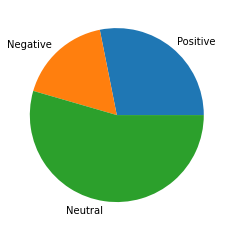

[28.135212418300654, 17.38153594771242, 54.48325163398693]

In [44]:
performSenticNet(dfZelenskyy)